## Importação das bibliotecas

In [103]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import files
import io

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

from IPython import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Dataset: Leitura, normalização e visualização dos dados

In [235]:
uploaded_file = files.upload()

Saving student_exam_data_new.csv to student_exam_data_new.csv


In [236]:
df = pd.read_csv('student_exam_data.csv')
df.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [237]:
student = df.to_numpy()

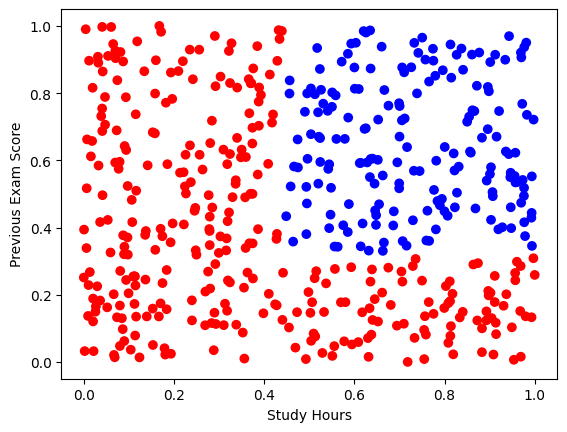

In [282]:
X =  student[:, [0, 1]]  # Study Hours e Previous Exam Score, indices 0 e 2
# normalização
Xc = X - X.min(axis=0)
Xs = Xc.max(axis=0)
Xc = Xc/Xs

Y =  df['Pass/Fail']
colors = np.array(['r','b'])
plt.scatter(Xc[:, 0], Xc[:, 1], c=colors[Y])
plt.xlabel('Study Hours')
plt.ylabel('Previous Exam Score')
plt.show()

#Dividindo Dataset em Treinamento E Validação

In [283]:
x_train, x_test, y_train, y_test = train_test_split(Xc, Y, test_size=0.2, random_state=42)

In [284]:

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 2)
(100, 2)
(400,)
(100,)


### Prepara os dados para o PyTorch

In [301]:
X_train_tensor = torch.FloatTensor(x_train)  # Entrada é FloatTensor
Y_train_tensor = torch.LongTensor(y_train.to_numpy()) # Classe é LongTensor
X_test_tensor = torch.FloatTensor(x_test)  # Entrada é FloatTensor
Y_test_tensor = torch.LongTensor(y_test.to_numpy()) # Classe é LongTensor

In [302]:
Y_train_tensor

tensor([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,

In [303]:
X_train_tensor

tensor([[0.8583, 0.6227],
        [0.0972, 0.5236],
        [0.2897, 0.1465],
        [0.6632, 0.3305],
        [0.0094, 0.1369],
        [0.0845, 0.1300],
        [0.5327, 0.1486],
        [0.6337, 0.1598],
        [0.7620, 0.4500],
        [0.1162, 0.5095],
        [0.7065, 0.2390],
        [0.4954, 0.7992],
        [0.0361, 0.4163],
        [0.7897, 0.4664],
        [0.9688, 0.2855],
        [0.3370, 0.5407],
        [0.9734, 0.5416],
        [0.0195, 0.8160],
        [0.1837, 0.2736],
        [0.0297, 0.2251],
        [0.6605, 0.9383],
        [0.6943, 0.1079],
        [0.5508, 0.8022],
        [0.4903, 0.7445],
        [0.5037, 0.8139],
        [0.3928, 0.7945],
        [0.3276, 0.9485],
        [0.9044, 0.1304],
        [0.8229, 0.4602],
        [0.2456, 0.4498],
        [0.1675, 1.0000],
        [0.8129, 0.0775],
        [0.0072, 0.6623],
        [0.8149, 0.8460],
        [0.9691, 0.0155],
        [0.1933, 0.0243],
        [0.9063, 0.5055],
        [0.4565, 0.8378],
        [0.5

## Construindo o modelo da rede

A saída da rede é composta por um neurônio para cada classe. A saída é denominada *scores* ou logitos:

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLogisticaRede_2_3.png)

In [304]:
model = nn.Linear(2,2)  # 2 entradas e 2 saídas

In [305]:
model.state_dict()

OrderedDict([('weight',
              tensor([[ 0.4321, -0.5241],
                      [-0.3469,  0.4498]])),
             ('bias', tensor([-0.6033,  0.0595]))])

### Fazendo um predict

In [306]:
out = model(X_train_tensor[:4,:]) # 4 amostras
out


tensor([[-0.5587,  0.0418],
        [-0.8357,  0.2613],
        [-0.5549,  0.0249],
        [-0.4899, -0.0219]], grad_fn=<AddmmBackward0>)

In [307]:
oo = F.softmax(out,dim=1)
oo

tensor([[0.3542, 0.6458],
        [0.2503, 0.7497],
        [0.3590, 0.6410],
        [0.3851, 0.6149]], grad_fn=<SoftmaxBackward0>)

#Calculando as probabilidades com Softmax

In [308]:
F.softmax(out,dim=1)*100

tensor([[35.4219, 64.5781],
        [25.0297, 74.9703],
        [35.8964, 64.1036],
        [38.5074, 61.4926]], grad_fn=<MulBackward0>)

### Predição da classe

In [309]:
prob,y_pred = torch.max(F.softmax(out,dim=1),dim=1)
print(y_pred)
print(prob)

tensor([1, 1, 1, 1])
tensor([0.6458, 0.7497, 0.6410, 0.6149], grad_fn=<MaxBackward0>)


## Treinamento

### Classe para visualização dinâmica

In [310]:
def predict(model, inputs):
    outputs = model(Variable(inputs))
    _, predicts = torch.max(outputs, 1)

    return predicts.data.numpy()

def predict_prob(model, inputs):
    outputs = model(Variable(inputs))
    outputs = F.softmax(outputs,dim=1)
    predicts, _ = torch.max(outputs, 1)

    return predicts.data.numpy()

class MyPlotter():
    def __init__(self, model, X, Y, n_epoch, filepath=None, h = .01):
        self.model = model
        self.X = X
        self.Y = Y
        self.n_epoch = n_epoch
        self.filepath = filepath
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        self.xx, self.yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        self.loss_hist = []
        self.val_loss_hist = []
        self.X_grid = np.c_[self.xx.ravel(), self.yy.ravel()]

        #Gráficos a serem mostrados pelo callback
        self.fig = plt.figure(figsize=(12, 4), dpi=100)
        self.ax1 = self.fig.add_subplot(1, 3, 1)
        self.ax1.set_xlim(0, nb_epoch)
        self.ax1.set_xlabel('Epoca')#,fontsize=28)
        self.ax1.set_ylabel('Perda')#,fontsize=28)
        self.ax1.set_title('Perda x Época')
        self.ax1.plot([],[],'b',linewidth = 2.0,label = "Treino")
        self.ax1.grid(True)

        self.ax2 = self.fig.add_subplot(1, 3, 2)
        self.ax2.set_xlim(Xc[:,0].min(), Xc[:,0].max())
        self.ax2.set_ylim(Xc[:,1].min(), Xc[:,1].max())
        self.ax2.set_xlabel('Comprimento da Sepala')#,fontsize=28)
        self.ax2.set_ylabel('Largura da Sepala')#,fontsize=28)
        self.ax2.set_title('Fronteiras de decisão')

        self.ax3 = self.fig.add_subplot(1, 3, 3)
        self.ax3.set_xlim(Xc[:,0].min(), Xc[:,0].max())
        self.ax3.set_ylim(Xc[:,1].min(), Xc[:,1].max())
        self.ax3.set_xlabel('Comprimento da Sepala')#,fontsize=28)
        self.ax3.set_ylabel('Largura da Sepala')#,fontsize=28)
        self.ax3.set_title('Máxima probabilidade')

    def on_train_begin(self, logs={}):
        display.display(self.fig)
        display.clear_output(wait=True)

    def on_epoch_end(self, epoch, logs={}):
        if 'loss' in logs.keys():
            self.loss_hist.append(logs['loss'])

            if epoch%250==0:
                self.ax1.plot(np.arange(epoch+1), self.loss_hist, 'b', linewidth = 2.0)

                #Z = predict(self.model, torch.from_numpy(self.X_grid).type(torch.FloatTensor))
                Zc = predict(self.model,torch.FloatTensor(self.X_grid))
                Zc = Zc.reshape(self.xx.shape)

                self.ax2.pcolormesh(self.xx, self.yy, Zc, cmap=plt.cm.Paired)
                colors = np.array(['r','y','b'])
                self.ax2.scatter(self.X[:, 0], self.X[:, 1], s=40, c=colors[self.Y], edgecolors='k', cmap=plt.cm.Paired)

                Zp = predict_prob(self.model,torch.FloatTensor(self.X_grid))
                Zp = Zp.reshape(self.xx.shape)

                self.ax3.pcolormesh(self.xx, self.yy, Zp, cmap=plt.cm.magma)
                colors = np.array(['r','y','b'])
                self.ax3.scatter(self.X[:, 0], self.X[:, 1], s=40, c=colors[self.Y], edgecolors='k', cmap=plt.cm.Paired)

                display.display(self.fig)
                display.clear_output(wait=True)

### Laço principal de treinamento da Regressão Logística por Softmax

In [311]:
lr = 0.15

optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

In [312]:
nb_epoch = 10000

losses = []
losses_test = []
acc_list = []
acc_test_list = []
for i in range(nb_epoch):
    # predict da rede
    output = model(X_train_tensor)
    output_test = model(X_test_tensor)

    # calcula a perda
    loss = criterion(output, Y_train_tensor)
    loss_test = criterion(output_test, Y_test_tensor)

    # Faz o backpropagation para calcular os gradientes e otimizar parâmetros
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.data.item())
    losses_test.append(loss_test.data.item())

    _, class_max = torch.max(F.softmax(output,dim=1),dim=1)
    _, class_test_max = torch.max(F.softmax(output_test,dim=1),dim=1)
    acc_list.append((class_max == Y_train_tensor).float().mean())
    acc_test_list.append((class_test_max == Y_test_tensor).float().mean())

    final_loss = loss.data.item()

print('Final loss:', final_loss)

Final loss: 0.25565028190612793


In [313]:

print(acc_list)

[tensor(0.3775), tensor(0.4125), tensor(0.4600), tensor(0.4850), tensor(0.5050), tensor(0.4875), tensor(0.4600), tensor(0.4475), tensor(0.4350), tensor(0.4350), tensor(0.4475), tensor(0.4450), tensor(0.4425), tensor(0.4400), tensor(0.4575), tensor(0.4600), tensor(0.4650), tensor(0.4800), tensor(0.4825), tensor(0.4850), tensor(0.4900), tensor(0.4900), tensor(0.5025), tensor(0.5075), tensor(0.5050), tensor(0.5075), tensor(0.5125), tensor(0.5175), tensor(0.5200), tensor(0.5225), tensor(0.5325), tensor(0.5350), tensor(0.5400), tensor(0.5475), tensor(0.5475), tensor(0.5475), tensor(0.5475), tensor(0.5525), tensor(0.5550), tensor(0.5625), tensor(0.5700), tensor(0.5725), tensor(0.5775), tensor(0.5800), tensor(0.5975), tensor(0.6025), tensor(0.6100), tensor(0.6200), tensor(0.6225), tensor(0.6325), tensor(0.6375), tensor(0.6450), tensor(0.6475), tensor(0.6475), tensor(0.6500), tensor(0.6500), tensor(0.6575), tensor(0.6600), tensor(0.6625), tensor(0.6675), tensor(0.6750), tensor(0.6800), tensor(

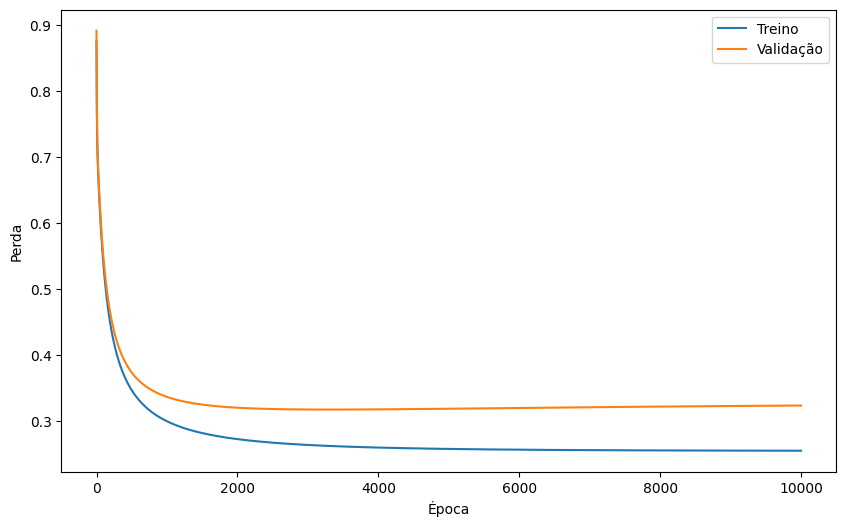

In [314]:
plt.figure(figsize=(10, 6))
plt.plot(list(range(nb_epoch)), losses, label='Treino')
plt.plot(list(range(nb_epoch)), losses_test, label='Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()

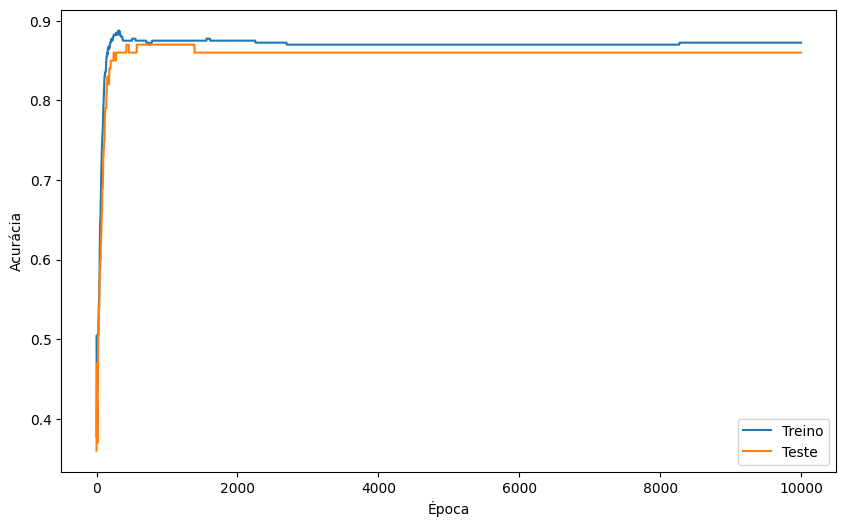

In [315]:
plt.figure(figsize=(10, 6))
plt.plot(list(range(nb_epoch)), acc_list, label='Treino')
plt.plot(list(range(nb_epoch)), acc_test_list, label='Teste')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

## Avaliação

### Parâmetros após treinamento

In [316]:
model.state_dict()

OrderedDict([('weight',
              tensor([[-5.0470, -4.4017],
                      [ 5.1321,  4.3274]])),
             ('bias', tensor([ 5.1967, -5.7405]))])

#Salvando os parâmetros treinados

In [317]:
os.makedirs('../models',exist_ok=True)
torch.save(model.state_dict(),'../models/RegrLog_Student.pt')

In [318]:
! ls ../models/

RegrLog_Student.pt


In [319]:
nn.init.constant(model.weight,0)
model.state_dict()

/tmp/ipython-input-952960416.py:1: FutureWarning: `nn.init.constant` is now deprecated in favor of `nn.init.constant_`.
  nn.init.constant(model.weight,0)


OrderedDict([('weight',
              tensor([[0., 0.],
                      [0., 0.]])),
             ('bias', tensor([ 5.1967, -5.7405]))])

#Recuperando os pesos salvos

In [320]:
param_saved = torch.load('../models/RegrLog_Student.pt')
model.load_state_dict(param_saved)
model.state_dict()

OrderedDict([('weight',
              tensor([[-5.0470, -4.4017],
                      [ 5.1321,  4.3274]])),
             ('bias', tensor([ 5.1967, -5.7405]))])

#Exatidão (acurácia) do classificador

Acurácia indica o número de acertos sobre o número total de amostras

In [321]:
Y_pred = predict(model, X_tensor)
accuracy = (Y_pred == Y).mean()
print('Training Accuracy: ', accuracy)

Training Accuracy:  0.87


#Matriz de confusão

In [322]:
pd.crosstab(Y_pred, Y)

Pass/Fail,0,1
row_0,,
0,287,36
1,29,148
